### Population converges to the quasi-stationary distribution around the carrying capacity when starting at different initial values

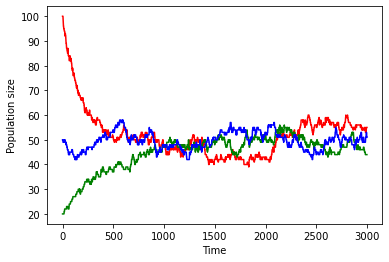

In [20]:
import numpy as np
import matplotlib.pyplot as plt
T = 3000
x = np.zeros(T)
k = 50
r = 0.004
n = np.array([100,20,50]) 
colors = ['Red', 'Green', 'blue']
for i in range(len(n)):
    x[0] = n[i]  
    for t in range(T - 1):
    
        birth   = np.random.rand() <= r*(x[t] - (x[t]**2)/(2*k))
        death   = np.random.rand() <= r*(x[t]**2)/(2*k)
        
        x[t+1] =  x[t] +(1*birth-1*death)
   
    plt.plot(x,color=colors[i]);
plt.xlabel('Time');
plt.ylabel('Population size');

 

### Sampling population at the quasi-stationary distribution gives us normal distribution with mean value equal to the carrying capacity (50)

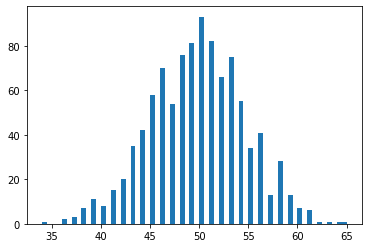

In [19]:
import matplotlib.pyplot as plt
import math
y = np.zeros(1000)

for j in range(1000):
    for t in range(T - 1):
       
        birth   = np.random.rand() <= r*(x[t] - (x[t]**2)/(2*k))
        death   = np.random.rand() <= r*(x[t]**2)/(2*k)
        x[t+1] =  x[t] +(1*birth-1*death)
    y[j] = x[T-1]
    
w = 0.5
n = math.ceil((y.max() - y.min())/w)
plt.hist(y, bins = n)
plt.show()

### Initial population size does not affect the mean time to extinction

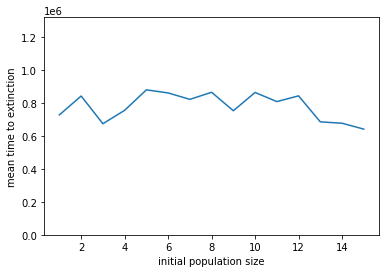

In [2]:
import pandas as pd
from numba import jit
import seaborn as sns

k = 8
r = 0.015
n =  np.arange(1,16,1)
nrepeat = 100
ave = np.zeros(len(n))


@jit(nopython=True)
def timeextinct(N):
        t = 0
        while N > 0:
            birth   =  np.random.rand()  <= r*(N - (N**2)/(2*k))
            death   =  np.random.rand()  <= r*(N**2)/(2*k)
            N = N+ 1*birth-1*death
            t += 1
        return(t)

for i in range(len(n)):  
    repeat =np.zeros(nrepeat)
    x = n[i] 
    for j in range(nrepeat):
        repeat[j] = timeextinct(x) 
    ave[i] = np.mean(repeat)

data = pd.DataFrame(ave,n)
plot = sns.lineplot(data=data, legend='')
plot.set(xlabel='initial population size', ylabel='mean time to extinction');
plot.set(ylim=(0, max(ave)+max(ave)/2));



#### The probability of going to 0 (absorbing state) from the quasi-stationary distribution in the second scenario (k = 8) is much higher than the probability of going to 0 from k = 50. Because population oscillates around the carrying capacity (8 or 50) it might accidentally go to zero. However, since 8 is closer to 0 it goes to zero (by chance) faster. Also, at larger values of r, population growth increases the probability of death (going to 0). 